In [2]:
from matplotlib import pyplot as plt
import argparse
import cv2

In [3]:
image = cv2.imread("F:\\internship\\weld bead\\13.jpg")
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)


In [9]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

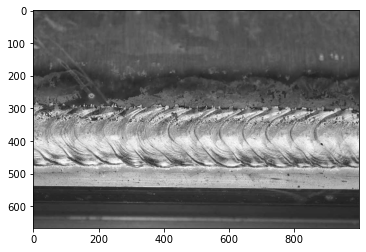

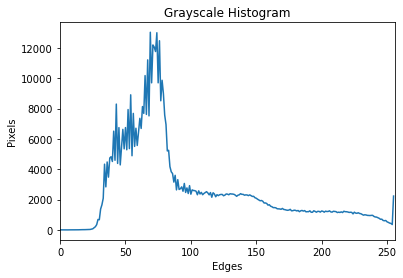

In [16]:
plt.figure()
#plt.axis("off")
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Edges")
plt.ylabel("Pixels")
plt.plot(hist)
plt.xlim([0, 256])
#plt.ylim([0, 2560])

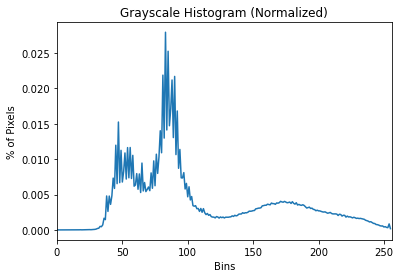

In [5]:
# normalize the histogram
hist /= hist.sum()
# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Color Histogram

In [6]:
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2

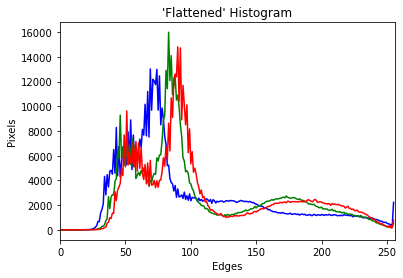

In [17]:
image = cv2.imread('F:\\internship\\weld bead\\13.jpg')
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Histogram")
plt.xlabel("Edges")
plt.ylabel("Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


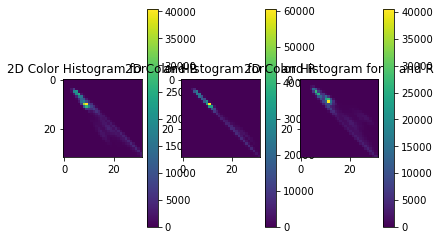

In [8]:
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

In [9]:
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


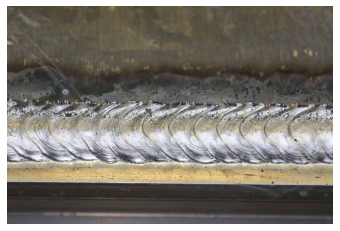

In [10]:
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))
# show our plots
plt.show()

# Computing image histograms for masked regions

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [25]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Edges")
	plt.ylabel("Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

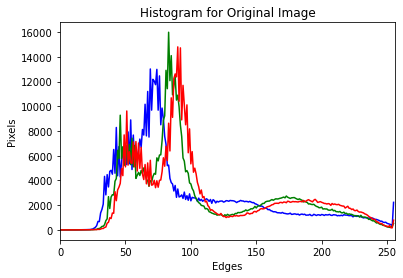

In [26]:
image = cv2.imread("F:\\internship\\weld bead\\13.jpg")
plot_histogram(image, "Histogram for Original Image")
image = cv2.resize(image,(400,400))
#cv2.imshow("Original", image)

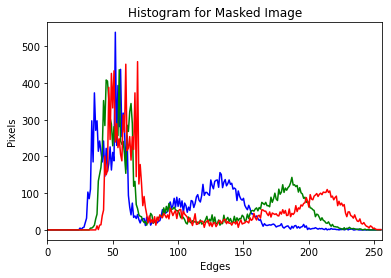

In [27]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
cv2.imshow("Mask", mask)
# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Applying the Mask", masked)
# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)
# show our plots
plt.show()

In [1]:
##Another